# GoogleNet (Inception)

In [ ]:
# Importar Librerías y Configurar Google Colab

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar Google Colab para trabajar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar y Preprocesar los Datos

# Definir rutas
train_dir = '//content/drive/MyDrive/Colab Notebooks/archive/Training'
test_dir = '/content/drive/MyDrive/Colab Notebooks/archive/Testing'

# Función para cargar imágenes y etiquetas
def load_data(data_dir, img_size=(128, 128)):
    images = []
    labels = []
    label_map = {'glioma_tumor': 0, 'meningioma_tumor': 1, 'pituitary_tumor': 2, 'no_tumor': 3}
    for category in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category)
        if os.path.isdir(category_path):
            for img_name in os.listdir(category_path):
                img_path = os.path.join(category_path, img_name)
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                images.append(img)
                labels.append(label_map[category])
    return np.array(images), np.array(labels)

# Cargar datos
X_train, y_train = load_data(train_dir)
X_test, y_test = load_data(test_dir)

# Normalizar imágenes
X_train = X_train / 255.0
X_test = X_test / 255.0

# Dividir datos de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Definir la Arquitectura de GoogleNet (InceptionV3)

# Cargar la arquitectura de InceptionV3 preentrenada
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Añadir capas superiores
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Definir el modelo completo
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar las capas base del modelo InceptionV3
for layer in base_model.layers:
    layer.trainable = False

# Compilar el modelo
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 63, 63, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 63, 63, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 63, 63, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 61, 61, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 61, 61, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 61, 61, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 61, 61, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 61, 61, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 61, 61, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 30, 30, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 30, 30, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 30, 30, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 30, 30, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 28, 28, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 28, 28, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 23,905,060 (91.19 MB)

 Trainable params: 2,102,276 (8.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [ ]:
# Entrenar y Evaluar el Modelo

# Utilizar ImageDataGenerator para aumentar los datos
data_gen_args = dict(rotation_range=10,
                     width_shift_range=0.1,
                     height_shift_range=0.1,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode='nearest')
image_datagen = ImageDataGenerator(**data_gen_args)

# Ajustar generadores a los datos
image_datagen.fit(X_train, augment=True)

# Generadores
train_generator = image_datagen.flow(X_train, y_train, batch_size=16, seed=42)

# Entrenar el modelo
history = model.fit(train_generator, epochs=20, steps_per_epoch=len(X_train) // 16,
                    validation_data=(X_val, y_val))

# Evaluar el modelo en los datos de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Pérdida: {loss:.4f}, Precisión: {accuracy * 100:.2f}%')

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 114s 719ms/step - accuracy: 0.4775 - loss: 4.3791 - val_accuracy: 0.7735 - val_loss: 0.5745
Epoch 2/20
  1/143 ━━━━━━━━━━━━━━━━━━━━ 1:06 468ms/step - accuracy: 0.8125 - loss: 0.5702

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 145ms/step - accuracy: 0.8125 - loss: 0.5702 - val_accuracy: 0.7700 - val_loss: 0.5701
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 100s 694ms/step - accuracy: 0.7432 - loss: 0.6468 - val_accuracy: 0.8136 - val_loss: 0.4746
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 144ms/step - accuracy: 0.8750 - loss: 0.3503 - val_accuracy: 0.7979 - val_loss: 0.4864
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 103s 721ms/step - accuracy: 0.7811 - loss: 0.5687 - val_accuracy: 0.7892 - val_loss: 0.5963
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 129ms/step - accuracy: 0.8750 - loss: 0.5132 - val_accuracy: 0.7962 - val_loss: 0.5586
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 124s 722ms/step - accuracy: 0.7887 - loss: 0.5478 - val_accuracy: 0.7822 - val_loss: 0.5320
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.8750 - loss: 0.5269 - val_accuracy: 0.7997 - val_loss: 0.5179
Epoch 9/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 691ms/step - accuracy: 0.7957 - loss: 0.5303 -

13/13 ━━━━━━━━━━━━━━━━━━━━ 12s 938ms/step


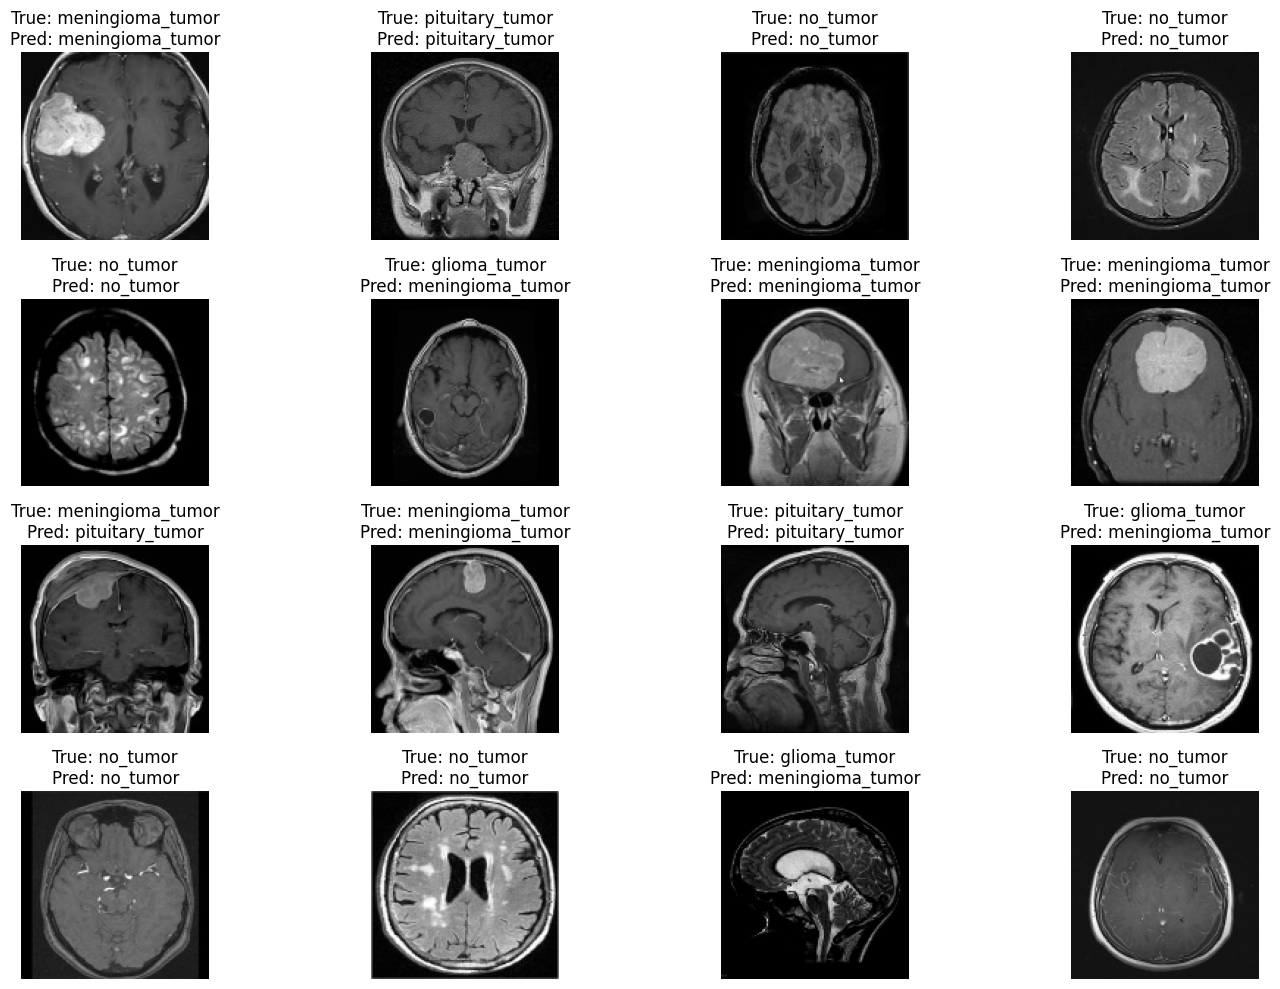

In [ ]:
# Mostrar Resultados de Clasificación

def plot_sample_images(X, y_true, y_pred, class_names, num_samples=4):
    plt.figure(figsize=(15, 10))
    indices = np.random.choice(len(X), num_samples*4, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(4, num_samples, i+1)
        plt.imshow((X[idx] * 255).astype(np.uint8))  # Desnormalizar las imágenes para visualización
        true_label = class_names[y_true[idx]]
        pred_label = class_names[y_pred[idx]]
        plt.title(f'True: {true_label}\nPred: {pred_label}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Obtener predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Mostrar imágenes de prueba, etiquetas verdaderas y predicciones
class_names = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']
plot_sample_images(X_test, y_test, y_pred_classes, class_names)